# Vectores 2D
Animación y Producción Digital




## 2.1 Vectores 2D

In [1]:
from math import sqrt, pi, ceil, floor
import matplotlib
import matplotlib.patches
from matplotlib.collections import PatchCollection


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlim, ylim

blue = 'C0'
black = 'k'
red = 'C3'
green = 'C2'
purple = 'C4'
orange = 'C2'
gray = 'gray'

class Polygon():
    def __init__(self, *vertices, color=blue, fill=None, alpha=0.4):
        self.vertices = vertices
        self.color = color
        self.fill = fill
        self.alpha = alpha

class Puntos():
    def __init__(self, *vectors, color=black):
        self.vectors = list(vectors)
        self.color = color

class Arrow():
    def __init__(self, tip, tail=(0,0), color=red):
        self.tip = tip
        self.tail = tail
        self.color = color

class Segment():
    def __init__(self, start_point, end_point, color=blue):
        self.start_point = start_point
        self.end_point = end_point
        self.color = color

# helper function to extract all the vectors from a list of objects
def extract_vectors(objects):
    for object in objects:
        if type(object) == Polygon:
            for v in object.vertices:
                yield v
        elif type(object) == Puntos:
            for v in object.vectors:
                yield v
        elif type(object) == Arrow:
            yield object.tip
            yield object.tail
        elif type(object) == Segment:
            yield object.start_point
            yield object.end_point
        else:
            raise TypeError("Unrecognized object: {}".format(object))

def draw(*objects, origin=True, axes=True, grid=(1,1), nice_aspect_ratio=True,
            width=6, save_as=None):

    all_vectors = list(extract_vectors(objects))
    xs, ys = zip(*all_vectors)

    max_x, max_y, min_x, min_y = max(0,*xs), max(0,*ys), min(0,*xs), min(0,*ys)

    #sizing
    if grid:
        x_padding = max(ceil(0.05*(max_x-min_x)), grid[0])
        y_padding = max(ceil(0.05*(max_y-min_y)), grid[1])

        def round_up_to_multiple(val,size):
            return floor((val + size) / size) * size

        def round_down_to_multiple(val,size):
            return -floor((-val - size) / size) * size

        plt.xlim(floor((min_x - x_padding) / grid[0]) * grid[0],
                ceil((max_x + x_padding) / grid[0]) * grid[0])
        plt.ylim(floor((min_y - y_padding) / grid[1]) * grid[1],
                ceil((max_y + y_padding) / grid[1]) * grid[1])

    if origin:
        plt.scatter([0],[0], color='k', marker='x')

    if grid:
        plt.gca().set_xticks(np.arange(plt.xlim()[0],plt.xlim()[1],grid[0]))
        plt.gca().set_yticks(np.arange(plt.ylim()[0],plt.ylim()[1],grid[1]))
        plt.grid(True)
        plt.gca().set_axisbelow(True)

    if axes:
        plt.gca().axhline(linewidth=2, color='k')
        plt.gca().axvline(linewidth=2, color='k')

    for object in objects:
        if type(object) == Polygon:
            for i in range(0,len(object.vertices)):
                x1, y1 = object.vertices[i]
                x2, y2 = object.vertices[(i+1)%len(object.vertices)]
                plt.plot([x1,x2],[y1,y2], color=object.color)
            if object.fill:
                xs = [v[0] for v in object.vertices]
                ys = [v[1] for v in object.vertices]
                plt.gca().fill(xs,ys,object.fill,alpha=object.alpha)
        elif type(object) == Puntos:
            xs = [v[0] for v in object.vectors]
            ys = [v[1] for v in object.vectors]
            plt.scatter(xs,ys,color=object.color)
        elif type(object) == Arrow:
            tip, tail = object.tip, object.tail
            tip_length = (xlim()[1] - xlim()[0]) / 20.
            length = sqrt((tip[1]-tail[1])**2 + (tip[0]-tail[0])**2)
            new_length = length - tip_length
            new_y = (tip[1] - tail[1]) * (new_length / length)
            new_x = (tip[0] - tail[0]) * (new_length / length)
            plt.gca().arrow(tail[0], tail[1], new_x, new_y,
            head_width=tip_length/1.5, head_length=tip_length,
            fc=object.color, ec=object.color)
        elif type(object) == Segment:
            x1, y1 = object.start_point
            x2, y2 = object.end_point
            plt.plot([x1,x2],[y1,y2], color=object.color)
        else:
            raise TypeError("Unrecognized object: {}".format(object))

    fig = matplotlib.pyplot.gcf()

    if nice_aspect_ratio:
        coords_height = (ylim()[1] - ylim()[0])
        coords_width = (xlim()[1] - xlim()[0])
        fig.set_size_inches(width , width * coords_height / coords_width)

    if save_as:
        plt.savefig(save_as)

    plt.show()

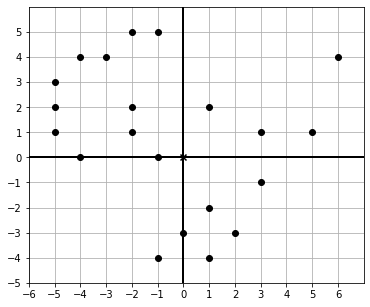

In [ ]:
vectores = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(
    Puntos(*vectores)
)

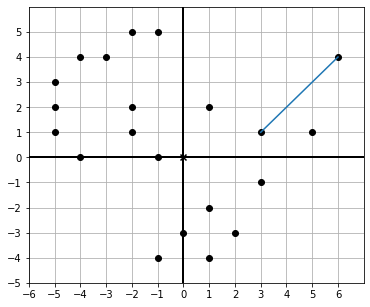

In [ ]:
draw(
    Puntos(*vectores),
    Segment((6,4),(3,1))
    
)

**Práctica:** Dibuje el dinosaurio con los puntos conectados utilizando la construcción de un objeto Polygon con `vectores` como vértices.

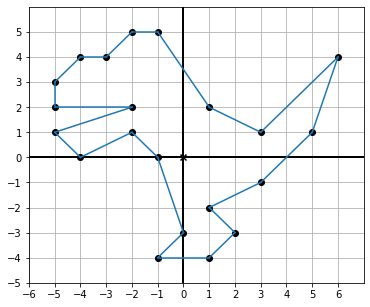

In [ ]:
draw(
    # Código aquí
)

# Aritmética vectorial





In [ ]:
def add(v1,v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

In [ ]:
vectores2 = [add((-5.5,-4.5), v) for v in vectores]

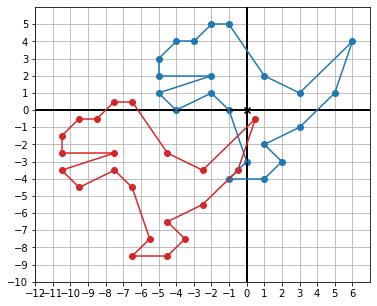

In [ ]:
draw(
    Puntos(*vectores, color=blue),
    Polygon(*vectores, color=blue),
    Puntos(*vectores2, color=red),
    Polygon(*vectores2, color=red)
)

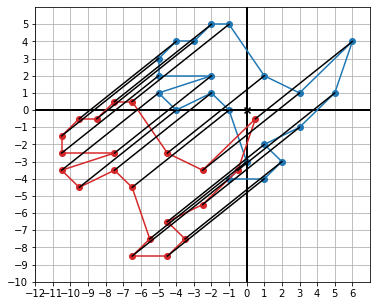

In [ ]:
flechas = [Segment(tip,tail,color=black) for (tip,tail) in
         zip(vectores2, vectores)]
draw(
    Puntos(*vectores, color=blue),
    Polygon(*vectores, color=blue),
    Puntos(*vectores2, color=red),
    Polygon(*vectores2, color=red),
    *arrows
)

## Componentes vectoriales y longitudes





In [ ]:
from math import sqrt
def length(v):
    return sqrt(v[0]**2 + v[1]**2) 

## Resta, desplazamiento y distancia

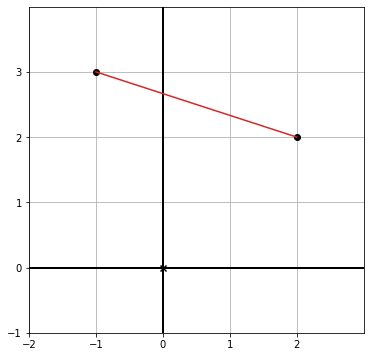

In [ ]:
draw(
    Puntos((2,2), (-1,3)),
    Segment((2,2), (-1,3), color=red)
)

**Tarea:** Sumar cualquier número de vectores sumando todas sus coordenadas x y todas sus coordenadas y. Por ejemplo, la suma cuádruple (1,2) + (2,4) + (3,6) + (4,8) tiene el componente x 1 + 2 + 3 + 4 = 10 y el componente y 2 + 4 + 6 + 8 = 20, haciendo el resultado (10,20). Implemente una función de suma revisada que tome cualquier número de vectores como argumentos.

In [ ]:
def add(*vectors):
    return # Código aquí

**Tarea:** Escribe una función trasladar(traslacion, vectores) que tome un vector de traslacion y una lista de vectores de entrada y devuelva una lista de los vectores de entrada, todos traducidos por el vector de traducción. Por ejemplo, `trasladar((1,1), [(0,0), (0,1,), (-3,-3)])` debería devolver `[(1,1),(1,2 ),(-2,-2)]`.

In [ ]:
def trasladar(traslacion, vectores):
    return #código aquí

trasladar((1,1), [(0,0), (0,1,), (-3,-3)])

[(1, 1), (1, 2), (-2, -2)]

¿Qué vector de la lista vector tiene la longitud más larga? Utilice la función de longitud de Python para calcular la respuesta rápidamente.

In [ ]:
>>> max(vectors, key=length)
(6, 4)

(6, 4)



Supongamos que un vector $\vec{w}$ tiene coordenadas $(2 ,3)$. ¿Cuáles son las coordenadas aproximadas del múltiplo escalar $\pi \cdot \vec{w}$? Dibuja una aproximación del vector original y el nuevo vector.

In [ ]:
from math import sqrt, pi

w = (sqrt(2),sqrt(3))
w_scaled = (pi * sqrt(2), pi * sqrt(3))

In [ ]:
w_scaled

(4.442882938158366, 5.441398092702653)

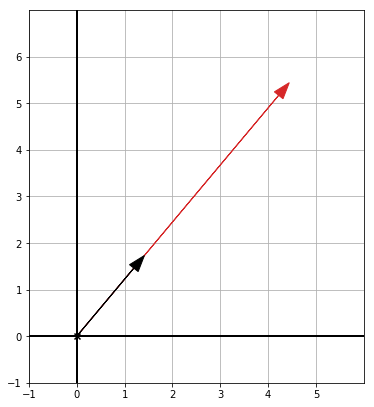

In [ ]:
draw(
    Arrow(w_scaled, color=red),
    Arrow(w, color=black)
)

Escriba una función de Python `scale(s, v)` que multiplique el vector de entrada `v` por el escalar de entrada `s`.

In [ ]:
def scale(scalar,v):
    return (scalar * v[0], scalar * v[1])

Supongamos que $\vec{u} = (-1,1)$ y $\vec{v} = (1,1)$ y supongamos que $r$ y $s$ son números reales. Específicamente, supongamos que $-1 < r < 1$ y $-3 < s < 3$.

¿Dónde están los posibles puntos en el plano donde podría terminar el vector $r \cdot \vec{u} + s \cdot \vec{v}$?

Nota: el orden de las operaciones es el mismo para los vectores que para los números: asumimos que primero se realiza la multiplicación escalar y luego la suma de vectores (a menos que los paréntesis especifiquen lo contrario).

Escriba una función de Python `subtract(v1,v2)` que devuelva el resultado de `v1` menos `v2`, donde las entradas y salidas son tuplas de coordenadas como hemos visto hasta ahora.

In [ ]:
def subtract(v1,v2):
    return (v1[0] - v2[0], v1[1] - v2[1])

Escriba una función de Python `distance(v1,v2)` que devuelva la distancia entre dos vectores de entrada (tenga en cuenta que la función de resta del anterior ya proporciona el desplazamiento).

Escriba otra función de Python `perimeter(vectors)` que tome una lista de vectores como argumento y devuelva la suma de las distancias de cada vector al siguiente, incluida la distancia del último vector al primero. ¿Cuál es el perímetro del polígono definido por `dino_vectors`?

In [ ]:
def distance(v1,v2):
    return length(subtract(v1,v2))

In [ ]:
def perimeter(vectors):
    distances = [distance(vectors[i], vectors[(i+1)%len(vectors)])
                    for i in range(0,len(vectors))]
    return sum(distances)

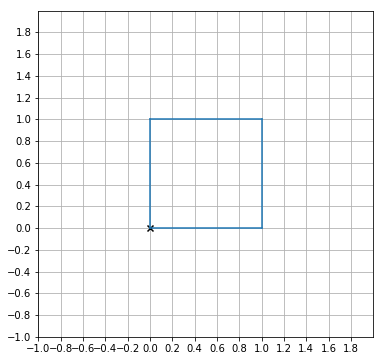

In [ ]:
# sanity check with a square
square = [(1,0),(1,1),(0,1),(0,0)]
draw(Polygon(*square), grid=(0.2,0.2), axes=None)

In [ ]:
# should be 1+1+1+1=4
perimeter(square)

4.0

In [ ]:
perimeter(dino_vectors)

44.77115093694563

Escriba una función de Python `distance(v1,v2)` que devuelva la distancia entre dos vectores de entrada (tenga en cuenta que la función de resta del ejercicio anterior ya proporciona el desplazamiento).

Escriba otra función de Python `perimeter(vectors)` que tome una lista de vectores como argumento y devuelva la suma de las distancias de cada vector al siguiente, incluida la distancia del último vector al primero. ¿Cuál es el perímetro del polígono definido por `dino_vectors`? Sea $\vec{u}$ el vector $(1,2)$. Supongamos que hay otro vector, $\vec{v}$, con coordenadas enteras positivas $(n, m)$ tales que $n > m$, y que tiene una distancia de $13$ desde $\vec{u}$. ¿Cuál es el desplazamiento de $\vec{u}$ a $\vec{v}$? Pista: puedes usar Python para buscar el vector $\vec{v}$.

Solo necesitamos buscar posibles pares de enteros (n,m) donde n está dentro de las 13 unidades de 1 y m está dentro de las 13 unidades de -1.

In [ ]:
for n in range(-12,15):
    for m in range(-14, 13):
        if distance((n,m), (1,-1)) == 13 and n > m > 0:
            print((n,m))

(13, 4)
